## Logistic Regression

Breast Cancer data from [the UCI repository](http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) contains records corresponding to 
cases of observed tumors.   There are a number of observations for each and a categorisation in the `class` column: 2 for benign (good), 4 for malignant (bad).  Your task is to build a logistic regression model to classify these cases. 

The data is provided as a CSV file.  There are a small number of cases where no value is available, these are indicated in the data with `?`. I have used the `na_values` keyword for `read_csv` to have these interpreted as `NaN` (Not a Number).  Your first task is to decide what to do with these rows. You could just drop these rows or you could [impute them from the other data](http://scikit-learn.org/stable/modules/preprocessing.html#imputation-of-missing-values).

You then need to follow the procedure outlined in the lecture for generating a train/test set, building and evaluating a model. Your goal is to build the best model possible over this data.   Your first step should be to build a logistic regression model using all of the features that are available.
  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE

In [2]:
bcancer = pd.read_csv("files/breast-cancer-wisconsin.csv", na_values="?")
bcancer.head()

,sample_code_number,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [3]:
# Examine the data, look at the statistical summary etc.
bcancer.describe()
bcancer['class'].unique()

array([2, 4], dtype=int64)

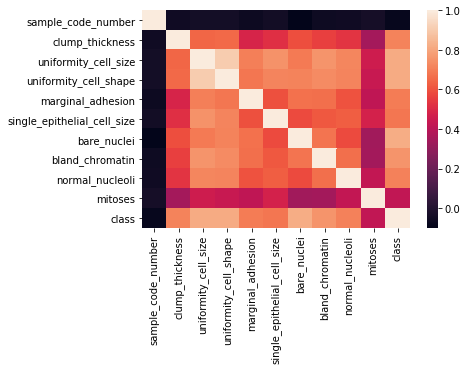

In [4]:
sns.heatmap(bcancer.corr())

In [5]:
# deal with the NaN values in the data
bcancer.isnull().any()
#fill null value with mean vlaue
#column name bare_nuclei with null value and fill with mean value
bcancer.bare_nuclei = bcancer.bare_nuclei.fillna(bcancer.bare_nuclei.mean())
bcancer.isnull().any()

sample_code_number             False
clump_thickness                False
uniformity_cell_size           False
uniformity_cell_shape          False
marginal_adhesion              False
single_epithelial_cell_size    False
bare_nuclei                    False
bland_chromatin                False
normal_nucleoli                False
mitoses                        False
class                          False
dtype: bool

In [6]:
#column: 2 for benign (good), 4 for malignant (bad)
bcancer['class']= bcancer['class'].replace(2,'good')
bcancer['class']= bcancer['class'].replace(4,'bad')

In [7]:
bcancer.head(2)

,sample_code_number,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1.0,3,1,1,good
1,1002945,5,4,4,5,7,10.0,3,2,1,good


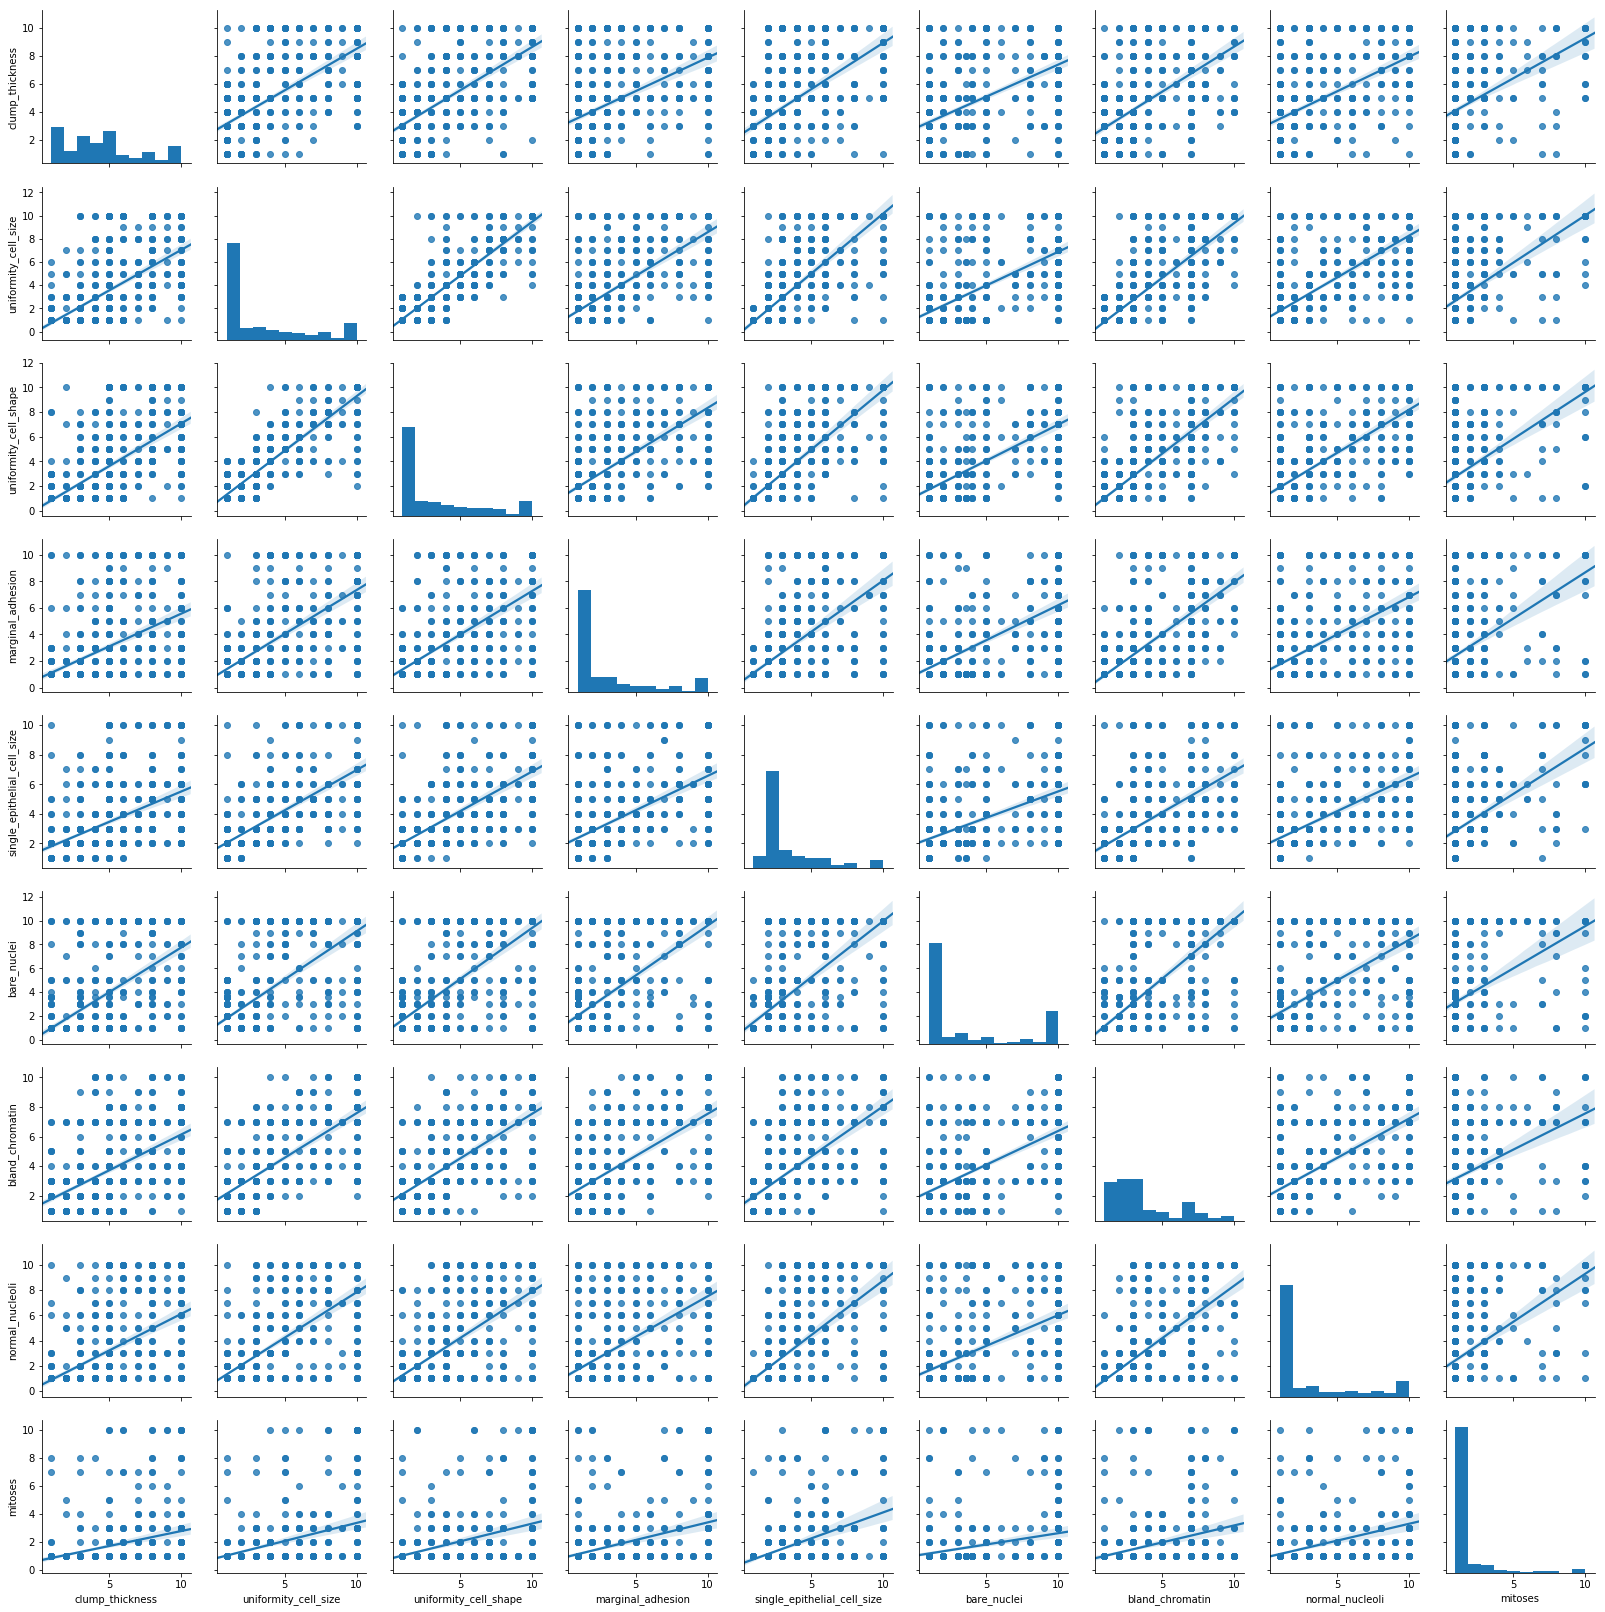

In [8]:
#check pairplot
sns.pairplot(data=bcancer[['clump_thickness','uniformity_cell_size','uniformity_cell_shape','marginal_adhesion','single_epithelial_cell_size','bare_nuclei','bland_chromatin','normal_nucleoli','mitoses']],kind='reg')

class
bad     241
good    458
dtype: int64

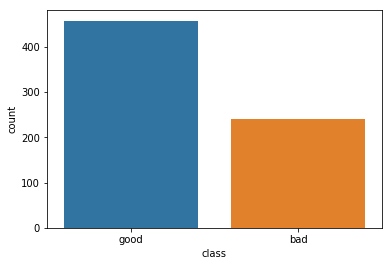

In [9]:
display(bcancer.groupby('class').size())
sns.countplot(bcancer['class'],label='Count')

In [10]:
# Build your first model - defining training and test data sets then use Logistic Regression to build a model
#feature_cols = ['clump_thickness','uniformity_cell_size','uniformity_cell_shape','marginal_adhesion','single_epithelial_cell_size','bare_nuclei','bland_chromatin','normal_nucleoli','mitoses']
X_train,X_test,y_train,y_test = train_test_split(bcancer.drop(['class','sample_code_number'],axis=1),bcancer['class'],stratify=bcancer['class'],test_size=0.2,random_state=7)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=0.1)
logreg.fit(X_train,y_train)

(559, 9) (140, 9)
(559,) (140,)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Evaluation

To evaluate a classification model we want to look at how many cases were correctly classified and how many
were in error.  In this case we have two outcomes - benign and malignant.   SKlearn has some useful tools, the 
[accuracy_score]() function gives a score from 0-1 for the proportion correct.  The 
[confusion_matrix](http://scikit-learn.org/stable/modules/model_evaluation.html#confusion-matrix) function 
shows how many were classified correctly and what errors were made.  Use these to summarise the performance of 
your model (these functions have already been imported above).

In [11]:
# Evaluate the model
y_pred_train = logreg.predict(X_train)
y_pred_test = logreg.predict(X_test)
print('Acc on training set : ',accuracy_score(y_train,y_pred_train))
print('Acc on test set : ',accuracy_score(y_test,y_pred_test))
print('Confusion matrix training :\n',confusion_matrix(y_train,y_pred_train))
print('Confusion matrix test :\n',confusion_matrix(y_test,y_pred_test))

Acc on training set :  0.9570661896243292
Acc on test set :  0.95
Confusion matrix training :
 [[179  14]
 [ 10 356]]
Confusion matrix test :
 [[45  3]
 [ 4 88]]


<img src="https://miro.medium.com/max/712/1*Z54JgbS4DUwWSknhDCvNTQ.png"
     alt="Markdown Monster icon"
     style="float: left; margin-right: 10px;" />

### Checkpoint

The checkpoint for this week workshop is to report accuracy on training and test set. Also, provide the confusion matrix to check for which class model is doing good and where error were are made. Based on these results, provide explaination about:
- Can we deploy this trained model in hospital's settings?
- Is model overfitting?
- For which class model is making error? Read about False Positive Rate (FPR) and False Negative Rate (FNR)

**On iLearn under Practical Week 6, make your submission in the form of results and their interpretation (1 paragraph) to get mark for this week checkpoint.**

false positive rate(type 1 error) = FP/FP+TN and false negative rate(type 2 error) = FN/FN+TP

In [12]:
positive,negative = confusion_matrix(y_test,y_pred_test)
print(f"False positive rate testing set : {(positive[1]/(positive[1]+negative[1]))*100}% and False negative rate testing set : {(negative[0]/(negative[0]+positive[0]))*100}%")

False positive rate testing set : 3.296703296703297% and False negative rate testing set : 8.16326530612245%


The accuracy score of <b>training dataset is 95.70%</b> and <b>testing dataset is 95%</b> so basically the model is good trained and can implemented in the hospital setting. However if the model had more Accuracy it might be good in the health care field. And this model is <b>not overfitted</b>. from the confusion matrix of testing dataset we can say that model is making error for class bad(malignant) and it is showing that the testing model predict the 3 sample are good but actually they are bad(malignant) also call this <b>False positive value</b>. False positive rate testing set : 3.296703296703297% and False negative rate testing set : 8.16326530612245%. Here, the specificity value is (1 - FPR) = 96.70% and sensitivity is (1 - FNR) = 91.84%.  

### Feature Selection

Since you have many features available, one part of building the best model will be to select which features to use as input to the classifier. Your initial model used all of the features but it is possible that a better model can 
be built by leaving some of them out.   Test this by building a few models with subsets of the features - how do your models perform? 

This process can be automated.  The [sklearn RFE function](http://scikit-learn.org/stable/modules/feature_selection.html#recursive-feature-elimination) implements __Recursive Feature Estimation__ which removes 
features one by one, evaluating the model each time and selecting the best model for a target number of features.  Use RFE to select features for a model with 3, 4 and 5 features - can you build a model that is as good or better than your initial model?

In [13]:
from sklearn.feature_selection import RFE

In [14]:
rfe = RFE(logreg,3)
rfe_model = rfe.fit(X_train,y_train)
print("No. features: ",rfe_model.n_features_)
print("Selected Features : ",rfe_model.support_)
print("Features Ranking : ",rfe_model.ranking_)

No. features:  3
Selected Features :  [False  True False False  True  True False False False]
Features Ranking :  [7 1 3 4 1 1 5 2 6]


In [15]:
#rfe for 3 features
estimator = LogisticRegression()
selector = RFE(estimator, 3, step=1)
selector = selector.fit(X_train, y_train)
y_predict = selector.predict(X_test)
print(accuracy_score(y_test, y_predict))
print(selector.support_)
print(selector.ranking_)

0.9642857142857143
[False False  True False False  True False False  True]
[4 3 1 6 7 1 2 5 1]


In [16]:
#rfe for 4 features 
estimator = LogisticRegression()
selector = RFE(estimator, 4, step=1)
selector = selector.fit(X_train, y_train)
y_predict = selector.predict(X_test)
print(accuracy_score(y_test, y_predict))
print(selector.support_)
print(selector.ranking_)

0.9714285714285714
[False False  True False False  True  True False  True]
[3 2 1 5 6 1 1 4 1]


In [17]:
#rfe for 5 features
estimator = LogisticRegression()
selector = RFE(estimator, 5, step=1)
cols = X_train.columns
selector = selector.fit(X_train, y_train)
y_predict = selector.predict(X_test)
print(accuracy_score(y_test, y_predict))
print(selector.support_)
print(selector.ranking_)

0.9714285714285714
[False  True  True False False  True  True False  True]
[2 1 1 4 5 1 1 3 1]


## Conclusion

Write a brief conclusion to your experiment.  You might comment on the proportion of __false positive__ and __false negative__ classifications your model makes.  How useful would this model be in a clinical diagnostic setting? 

The model is predicting wrong values arroung 5% range as well as we do not need all the features to explain cause some of them are not required, so generating the results for no of variables and choosing the best one which is explaining the most which is almost should be equal to the one with the one having all the features. here the false positive rate is around 3 % and false negative rate is around 9 % . so here the 3 % of the sample answer actually bad but show good and 9 % flase negative rate show answer bad however actually is good.